#15. In a new notebook, do: -- DBSCAN on aspect of your data and visualize TPOT on an aspect of your final project, and implement its suggestion plus report on your results Dendrogram that is readable and legible (you can take representative samples from your data) Spelling counts from now on! (too many misspelled words in your notebooks)


#Imports

In [33]:
!pip install --upgrade --force-reinstall scikit-learn tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 3

MSE = 4226729.312154886, Root Mean Squared Error: 2055.901094934989

Random Forest gave me RMSE:  1821.6868970062608

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sympy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive #mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cleaned_listings_data = pd.read_csv('/content/drive/MyDrive/CS 356/Final Project/cleaned_listings_Data3.csv')# read the csv file

I felt like converting Baht to USD, becuase it's easier for me to understand my results.

#About

In [5]:
cleaned_listings_data = cleaned_listings_data.drop(['Unnamed: 0'], axis=1)
cleaned_listings_data.head()

,id,host_id,host_listings_count,bangkok_neighbourhood,latitude,longitude,room_type,guest_capacity,bathrooms,beds,price,minimum_nights_required,maximum_nights,days_available_30,days_available_60,days_available_90,days_available_365,number_of_reviews,review_scores_rating,review_scores_value
0,37266430,169629900,3,Bang Bon,13.648950,100.405230,Entire home/apt,2,1.0,2.0,32.400,14,360,0,0,0,0,1,5.0,5.00
1,879991666649774041,172981732,3,Bang Bon,13.660378,100.363735,Entire home/apt,10,3.0,4.0,97.200,1,1125,14,44,74,349,2,4.0,4.50
2,42919866,341361309,1,Bang Kapi,13.749560,100.606340,Entire home/apt,1,1.0,1.0,46.440,2,1125,29,59,89,179,1,5.0,5.00
3,22559178,165770980,1,Bang Kapi,13.761680,100.640840,Entire home/apt,4,2.0,2.0,62.073,1,365,24,48,77,352,4,5.0,4.75
4,888704290577772271,276781306,72,Bang Kapi,13.757530,100.639240,Entire home/apt,4,1.0,2.0,31.833,28,365,28,58,88,363,1,4.0,4.00


In [6]:
cleaned_listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12785 entries, 0 to 12784
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12785 non-null  int64  
 1   host_id                  12785 non-null  int64  
 2   host_listings_count      12785 non-null  int64  
 3   bangkok_neighbourhood    12785 non-null  object 
 4   latitude                 12785 non-null  float64
 5   longitude                12785 non-null  float64
 6   room_type                12785 non-null  object 
 7   guest_capacity           12785 non-null  int64  
 8   bathrooms                12785 non-null  float64
 9   beds                     12785 non-null  float64
 10  price                    12785 non-null  float64
 11  minimum_nights_required  12785 non-null  int64  
 12  maximum_nights           12785 non-null  int64  
 13  days_available_30        12785 non-null  int64  
 14  days_available_60     

In [7]:
df1=cleaned_listings_data.copy()

In [8]:
df1 = df1.drop(['id', 'host_id', 'review_scores_value'], axis=1)

In [9]:
df1.head()

,host_listings_count,bangkok_neighbourhood,latitude,longitude,room_type,guest_capacity,bathrooms,beds,price,minimum_nights_required,maximum_nights,days_available_30,days_available_60,days_available_90,days_available_365,number_of_reviews,review_scores_rating
0,3,Bang Bon,13.648950,100.405230,Entire home/apt,2,1.0,2.0,32.400,14,360,0,0,0,0,1,5.0
1,3,Bang Bon,13.660378,100.363735,Entire home/apt,10,3.0,4.0,97.200,1,1125,14,44,74,349,2,4.0
2,1,Bang Kapi,13.749560,100.606340,Entire home/apt,1,1.0,1.0,46.440,2,1125,29,59,89,179,1,5.0
3,1,Bang Kapi,13.761680,100.640840,Entire home/apt,4,2.0,2.0,62.073,1,365,24,48,77,352,4,5.0
4,72,Bang Kapi,13.757530,100.639240,Entire home/apt,4,1.0,2.0,31.833,28,365,28,58,88,363,1,4.0


In [10]:
df1['price']

0        32.400
1        97.200
2        46.440
3        62.073
4        31.833
          ...  
12780    94.500
12781    99.522
12782    24.300
12783    24.300
12784    28.053
Name: price, Length: 12785, dtype: float64

In [11]:
df1['price'].min()


6.75

In [12]:
df1['price'].max()


1079.973

##Remove outliers

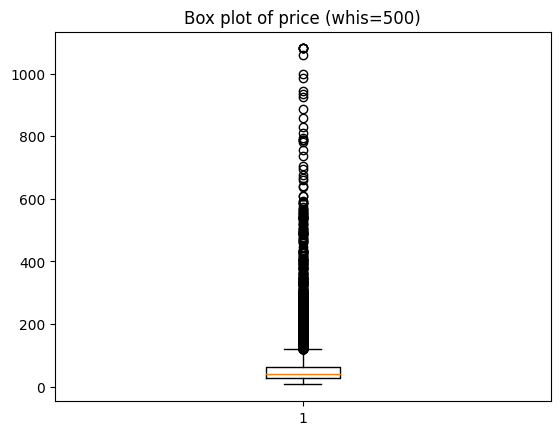

The score threshold is: 1.0
Number of outliers is: 1543
The score threshold is: 1.5
Number of outliers is: 1171
The score threshold is: 2.0
Number of outliers is: 915
The score threshold is: 2.5
Number of outliers is: 760
The score threshold is: 3.0
Number of outliers is: 595
The score threshold is: 3.5
Number of outliers is: 458
The score threshold is: 4.0
Number of outliers is: 388
The score threshold is: 4.5
Number of outliers is: 310


In [13]:
plt.boxplot(df1["price"])
plt.title("Box plot of price (whis=500)")
plt.show()

q75, q25 = np.percentile(df1["price"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df1["price"] > max_val)
                      | (df1["price"] < min_val))[0]))
    ))

In [14]:
# Filter out all prices above 700 since anything higher is high for bangkok
df1 = df1[df1['price'] <= 700]

In [15]:
df1.price.describe()


count    12762.000000
mean        57.748697
std         61.301522
min          6.750000
25%         26.568000
50%         39.960000
75%         63.612000
max        694.629000
Name: price, dtype: float64

In [16]:
df1.bangkok_neighbourhood.value_counts()


bangkok_neighbourhood
Khlong Toei             2105
Vadhana                 1990
Huai Khwang             1060
Ratchathewi              956
Sathon                   672
Bang Rak                 596
Phra Khanong             498
Phra Nakhon              462
Parthum Wan              379
Chatu Chak               371
Bang Na                  322
Din Daeng                321
Khlong San               301
Phaya Thai               295
Suanluang                262
Bang Kapi                213
Bang Sue                 193
Bang Phlat               181
Thon buri                129
Lat Krabang              115
Yan na wa                114
Pom Prap Sattru Phai     113
Don Mueang               108
Bang Kho laen             96
Bangkok Noi               88
Phasi Charoen             85
Lak Si                    79
Samphanthawong            79
Pra Wet                   73
Chom Thong                54
Bang Khen                 54
Wang Thong Lang           54
Bangkok Yai               52
Dusit                

In [25]:
df1.columns

Index(['host_listings_count', 'bangkok_neighbourhood', 'latitude', 'longitude',
       'room_type', 'guest_capacity', 'bathrooms', 'beds', 'price',
       'minimum_nights_required', 'maximum_nights', 'days_available_30',
       'days_available_60', 'days_available_90', 'days_available_365',
       'number_of_reviews', 'review_scores_rating'],
      dtype='object')

#TPOT

Im using regressor because id like to predict the price.

In [26]:
df1_encoded = pd.get_dummies(df1, columns=['bangkok_neighbourhood', 'room_type'])

y = df1_encoded['price']
X = df1_encoded.drop(['price'],axis=1)


In [27]:
from tpot import TPOTRegressor
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_bangkok_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1788.7562799564967

Generation 2 - Current best internal CV score: -1694.370446774206

Generation 3 - Current best internal CV score: -1694.370446774206

Generation 4 - Current best internal CV score: -1689.9872673304442

Generation 5 - Current best internal CV score: -1650.697278935914

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.5, verbosity=0)
-1344.7916594712694


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = tpot.predict(X_test)

# Calculate different metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Absolute Error (MAE): 19.78667690452211
Mean Squared Error (MSE): 1344.7916594712694
Root Mean Squared Error (RMSE): 36.671401111373825
R-squared: 0.6059751940588476


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
from xgboost import XGBRegressor
# Setting up the XGBRegressor with the specified parameters
model = XGBRegressor(
    learning_rate=0.1,
    max_depth=8,
    min_child_weight=1,
    n_estimators=100,
    n_jobs=1,
    objective='reg:squarederror',
    subsample=0.5,
    verbosity=0
)

# Fitting the model
model.fit(X_train, y_train)

## Evaluating the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1385.6818395913679


MSE of 1385 doesnt make sense. The price range is 6.5 usd - 700 usd. So its larger than that...

#DBSCAN

I want to see if it could correctly predict bangkok neighborhoods.

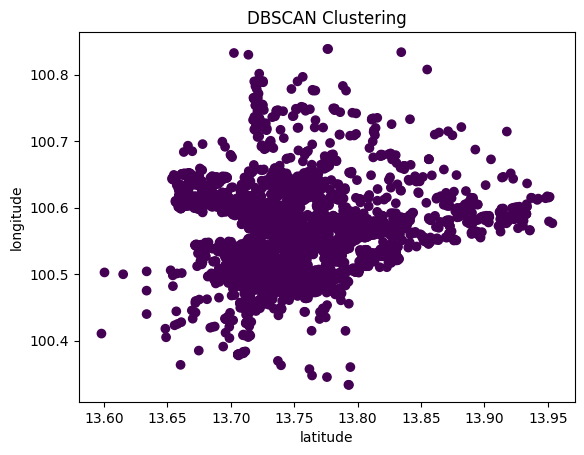

In [46]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

X_clustering = df1_encoded[['latitude', 'longitude']]

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust these parameters based on your data density
clusters = dbscan.fit_predict(X_clustering)

# Plotting
plt.scatter(X_clustering['latitude'], X_clustering['longitude'], c=clusters, cmap='viridis')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('DBSCAN Clustering')
plt.show()



In [47]:
X_clustering.head()

,latitude,longitude
0,13.648950,100.405230
1,13.660378,100.363735
2,13.749560,100.606340
3,13.761680,100.640840
4,13.757530,100.639240


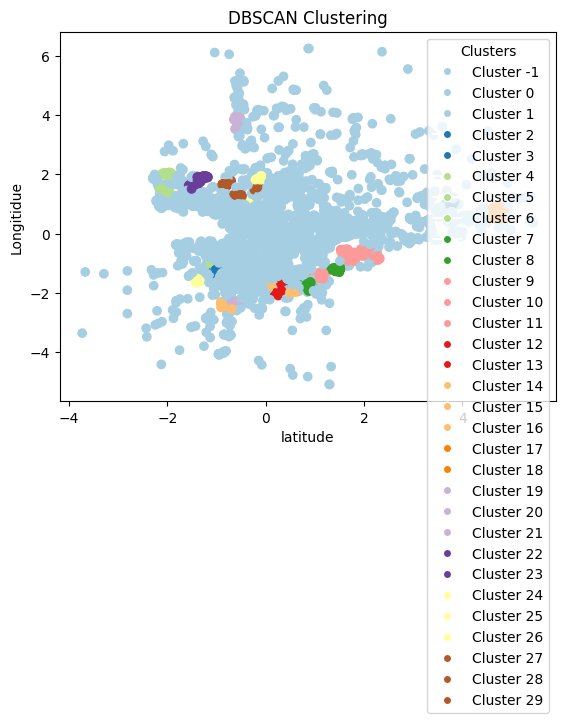

In [52]:
X_clustering = df1_encoded[['latitude', 'longitude']]
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired', label=np.unique(y_pred))
    plt.title("DBSCAN")
    # Generate a custom legend
    unique_labels = np.unique(y_pred)
    colors = [plt.cm.Paired(each) for each in np.linspace(0, 1, len(unique_labels))]
    custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i),
                                markerfacecolor=color, markersize=6) for i, color in zip(unique_labels, colors)]
    plt.legend(handles=custom_legend, title="Clusters")

    # Add titles and labels (optional)
    plt.title("DBSCAN Clustering")
    plt.xlabel("latitude")
    plt.ylabel("Longitidue")

dbscan(X_clustering,0.1, 12)

DBSCAN is not a good tool to use for my data. These values did not cluster my data well or in a meaningful way.

#Dendrogram

In [59]:
from scipy.spatial.distance import pdist
# Calculate a distance matrix with selected variables
X = df1_encoded[['latitude', 'longitude']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pdist() calculates pairs of distances between each instance in the dataset
dist = pdist(X)

clusterModel = linkage(dist, method='single')

# Compute the distance matrix
dist = pdist(X_scaled)

# Perform hierarchical clustering using the centroid method
#clusterModel = linkage(dist, method='centroid')
print(clusterModel)

[[4.08800000e+03 4.09400000e+03 0.00000000e+00 2.00000000e+00]
 [3.92400000e+03 4.00900000e+03 0.00000000e+00 2.00000000e+00]
 [3.99800000e+03 3.99900000e+03 0.00000000e+00 2.00000000e+00]
 ...
 [4.00000000e+02 2.55190000e+04 4.61452584e-02 1.27580000e+04]
 [2.12380000e+04 2.55200000e+04 4.62151115e-02 1.27600000e+04]
 [2.55180000e+04 2.55210000e+04 5.78968756e-02 1.27620000e+04]]


In [60]:
num_rows = len(clusterModel)
num_rows

12761

#12761 merges in this - I'm not going to plot it all since it will take a long time and look like a tornado

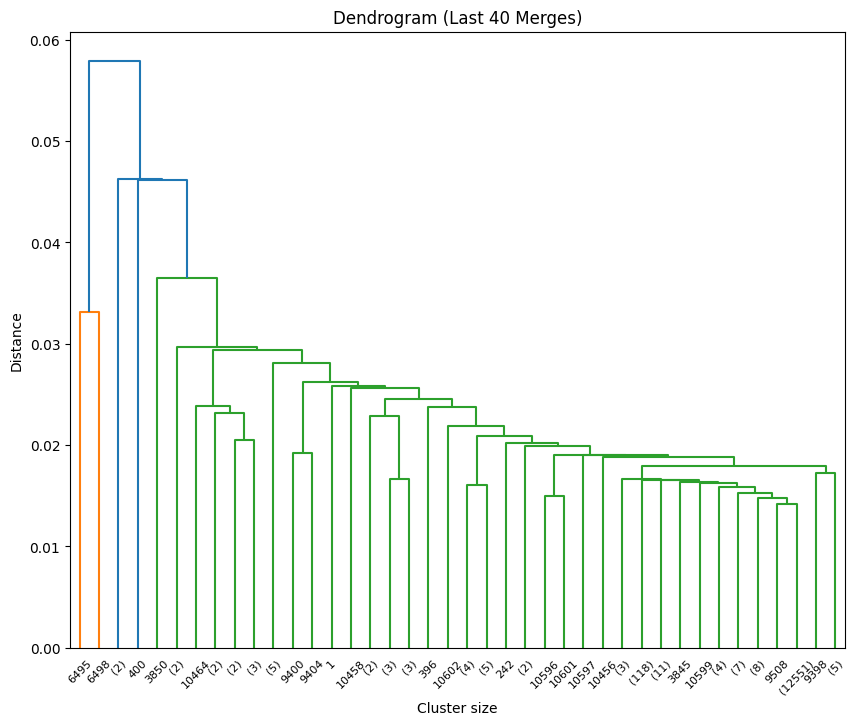

In [65]:
# Create the dendrogram with the subset of merge operations

# Assuming 'clusterModel' is your linkage matrix
plt.figure(figsize=(10, 8))
dendrogram(clusterModel, truncate_mode='lastp', p=40, show_leaf_counts=True)
plt.title('Dendrogram (Last 40 Merges)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

There is a lot of very closly related data points. But, I cant visualize the entire thing to determine the amount of clusters I should use.

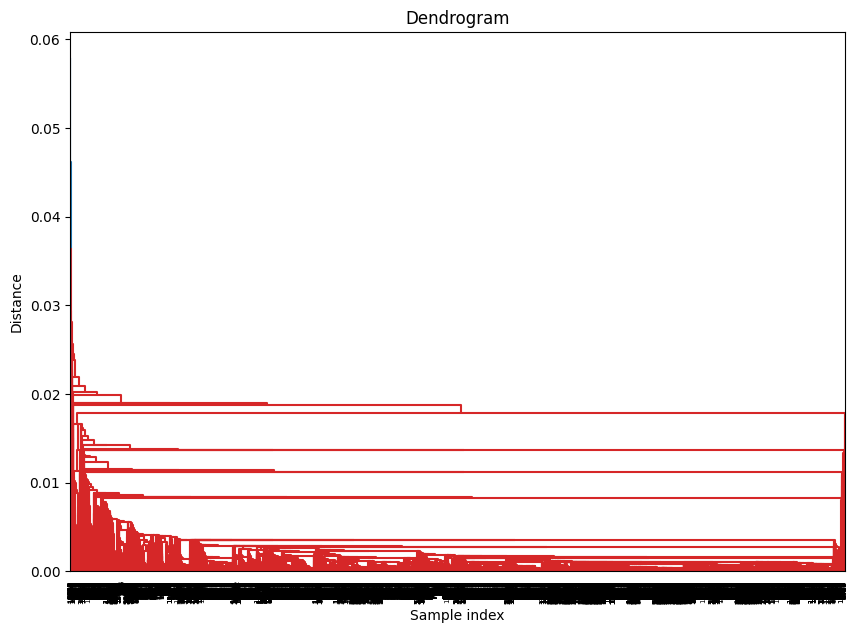

In [70]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(clusterModel)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
